In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('M1-train.csv')
df.head()

,Timestamp,Bearing,BlockRef,CallDistanceAlongRoute,DataFrameRef,DatedVehicleJourneyRef,DestinationName,DestinationRef,DirectionRef,DistanceFromCall,...,StopPointRef,StopsFromCall,VehicleRef,VisitNumber,DayOfWeek,Holiday,BusLane,VehicleDistanceAlongRoute,Segment,NewVehicleRef
0,2018-04-06 16:00:01-04:00,233.35362,MTA NYCT_OF_B8-Weekday_C_OF_29220_M1-122,5169.49,2018-04-06,MTA NYCT_OF_B8-Weekday-092900_M1_145,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,23.58,...,MTA_400117,0,MTA NYCT_3891,1,5,0,True,5145.91,188189,MTA NYCT_3891_1
1,2018-04-06 16:00:32-04:00,233.91893,MTA NYCT_OF_B8-Weekday_C_OF_29220_M1-122,5398.92,2018-04-06,MTA NYCT_OF_B8-Weekday-092900_M1_145,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,107.21,...,MTA_400118,0,MTA NYCT_3891,1,5,0,True,5291.71,188189,MTA NYCT_3891_1
2,2018-04-06 16:01:04-04:00,233.91893,MTA NYCT_OF_B8-Weekday_C_OF_29220_M1-122,5398.92,2018-04-06,MTA NYCT_OF_B8-Weekday-092900_M1_145,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,105.06,...,MTA_400118,0,MTA NYCT_3891,1,5,0,True,5293.86,188189,MTA NYCT_3891_1
3,2018-04-06 16:01:34-04:00,234.37209,MTA NYCT_OF_B8-Weekday_C_OF_29220_M1-122,5398.92,2018-04-06,MTA NYCT_OF_B8-Weekday-092900_M1_145,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,4.29,...,MTA_400118,0,MTA NYCT_3891,1,5,0,True,5394.63,188189,MTA NYCT_3891_1
4,2018-04-06 16:02:06-04:00,233.95068,MTA NYCT_OF_B8-Weekday_C_OF_29220_M1-122,5621.35,2018-04-06,MTA NYCT_OF_B8-Weekday-092900_M1_145,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,203.00,...,MTA_400119,0,MTA NYCT_3891,1,5,0,True,5418.35,188189,MTA NYCT_3891_1


In [3]:
seg = pd.read_csv('data/traffic-features-mim.csv')
seg

,segment_id,ID,from,to,segment,meter,feet,intersections,blocks,busstops
0,1,188189,188,189,5th Avenue - Southbound - 96th St to 86th St,811.76,2663.22,11,10,4
1,2,18922,189,22,5th Avenue - Southbound - 86th St to 72nd St,1153.06,3782.96,15,14,5
2,3,2216,22,16,5th Avenue - Southbound - 72nd St to 57th St,1207.64,3962.03,16,15,6
3,4,1615,16,15,5th Avenue - Southbound - 57th St to 49th St,642.36,2107.45,9,8,1
4,5,1514,15,14,5th Avenue - Southbound - 49th St to 42nd St,564.20,1851.03,8,7,3
5,6,14118,14,118,5th Avenue - Southbound - 42nd St to 34th St,642.87,2109.13,9,8,3


In [4]:
df = df.merge(seg, left_on='Segment', right_on='ID', how='inner')

In [5]:
df = df[['Timestamp','NewVehicleRef', 'VehicleDistanceAlongRoute', 'segment_id', 'DayOfWeek', 'Holiday', 'BusLane']]

In [6]:
df.head()

,Timestamp,NewVehicleRef,VehicleDistanceAlongRoute,segment_id,DayOfWeek,Holiday,BusLane
0,2018-04-06 16:00:01-04:00,MTA NYCT_3891_1,5145.91,1,5,0,True
1,2018-04-06 16:00:32-04:00,MTA NYCT_3891_1,5291.71,1,5,0,True
2,2018-04-06 16:01:04-04:00,MTA NYCT_3891_1,5293.86,1,5,0,True
3,2018-04-06 16:01:34-04:00,MTA NYCT_3891_1,5394.63,1,5,0,True
4,2018-04-06 16:02:06-04:00,MTA NYCT_3891_1,5418.35,1,5,0,True


M1 Bus Stops from: https://bustime.mta.info/m/;jsessionid=BF8A7BE70A434A7BA0468C768AC9E5A7?q=M1#0

In [7]:
#check number of buses in service on route
df.NewVehicleRef.nunique()

84

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.tz_localize('UTC').dt.tz_convert('America/New_York')

In [9]:
df['Time'] = df['Timestamp'].dt.strftime("%H:%M:%S")

In [10]:
df['Date'] = df['Timestamp'].dt.date

### Find Link Travel Time between segments

In [11]:
df.head()

,Timestamp,NewVehicleRef,VehicleDistanceAlongRoute,segment_id,DayOfWeek,Holiday,BusLane,Time,Date
0,2018-04-06 16:00:01-04:00,MTA NYCT_3891_1,5145.91,1,5,0,True,16:00:01,2018-04-06
1,2018-04-06 16:00:32-04:00,MTA NYCT_3891_1,5291.71,1,5,0,True,16:00:32,2018-04-06
2,2018-04-06 16:01:04-04:00,MTA NYCT_3891_1,5293.86,1,5,0,True,16:01:04,2018-04-06
3,2018-04-06 16:01:34-04:00,MTA NYCT_3891_1,5394.63,1,5,0,True,16:01:34,2018-04-06
4,2018-04-06 16:02:06-04:00,MTA NYCT_3891_1,5418.35,1,5,0,True,16:02:06,2018-04-06


In [12]:
df.columns

Index([u'Timestamp', u'NewVehicleRef', u'VehicleDistanceAlongRoute',
       u'segment_id', u'DayOfWeek', u'Holiday', u'BusLane', u'Time', u'Date'],
      dtype='object')

In [13]:
#records of buses from point closest/furthest to start of segment
dfo = df.loc[df.groupby(['NewVehicleRef', 'segment_id', 'Date'])['VehicleDistanceAlongRoute'].idxmin()]
dfd = df.loc[df.groupby(['NewVehicleRef', 'segment_id', 'Date'])['VehicleDistanceAlongRoute'].idxmax()]

In [14]:
#get difference between DistanceFromCall (y-x)
df_avg = dfo.merge(dfd, on=['NewVehicleRef', 'segment_id', 'Date'])

In [15]:
df_avg.shape

(1103, 15)

In [16]:
df_avg.columns

Index([u'Timestamp_x', u'NewVehicleRef', u'VehicleDistanceAlongRoute_x',
       u'segment_id', u'DayOfWeek_x', u'Holiday_x', u'BusLane_x', u'Time_x',
       u'Date', u'Timestamp_y', u'VehicleDistanceAlongRoute_y', u'DayOfWeek_y',
       u'Holiday_y', u'BusLane_y', u'Time_y'],
      dtype='object')

In [17]:
df_avg = df_avg[['Timestamp_x', 'NewVehicleRef', 'VehicleDistanceAlongRoute_x', 'VehicleDistanceAlongRoute_y', 'Timestamp_y', 'segment_id']]

In [18]:
df_avg['DistanceDelta'] = df_avg['VehicleDistanceAlongRoute_y'] - df_avg['VehicleDistanceAlongRoute_x']
df_avg['TimeDelta'] = df_avg['Timestamp_y'] - df_avg['Timestamp_x']
df_avg['TimeDelta'] = df_avg['TimeDelta'].astype('timedelta64[s]').astype(int)
df_avg['AvgSpeed'] = df_avg['DistanceDelta'] / df_avg['TimeDelta']

In [19]:
df_avg.shape

(1103, 9)

In [20]:
df_avg.head()

,Timestamp_x,NewVehicleRef,VehicleDistanceAlongRoute_x,VehicleDistanceAlongRoute_y,Timestamp_y,segment_id,DistanceDelta,TimeDelta,AvgSpeed
0,2018-04-08 16:00:17.604000-04:00,MTA NYCT_3829_1,5615.26,6617.98,2018-04-08 16:07:08.380000-04:00,2,1002.72,410,2.445659
1,2018-04-08 16:07:40.959000-04:00,MTA NYCT_3829_1,6835.98,7782.48,2018-04-08 16:16:25.444000-04:00,3,946.50,524,1.806298
2,2018-04-08 16:16:56.783000-04:00,MTA NYCT_3829_1,8052.09,8459.35,2018-04-08 16:21:11.943000-04:00,4,407.26,255,1.597098
3,2018-04-08 16:21:42.724000-04:00,MTA NYCT_3829_1,8759.57,9013.54,2018-04-08 16:23:17.378000-04:00,5,253.97,94,2.701809
4,2018-04-08 16:23:49.024000-04:00,MTA NYCT_3829_1,9093.23,9543.31,2018-04-08 16:25:54.149000-04:00,6,450.08,125,3.600640


In [21]:
df_avg['timeinseconds'] = (df_avg['Timestamp_x'].dt.hour * 3600) + (df_avg['Timestamp_x'].dt.minute * 60) + (df_avg['Timestamp_x'].dt.second)

In [22]:
df_avg.head()

,Timestamp_x,NewVehicleRef,VehicleDistanceAlongRoute_x,VehicleDistanceAlongRoute_y,Timestamp_y,segment_id,DistanceDelta,TimeDelta,AvgSpeed,timeinseconds
0,2018-04-08 16:00:17.604000-04:00,MTA NYCT_3829_1,5615.26,6617.98,2018-04-08 16:07:08.380000-04:00,2,1002.72,410,2.445659,57617
1,2018-04-08 16:07:40.959000-04:00,MTA NYCT_3829_1,6835.98,7782.48,2018-04-08 16:16:25.444000-04:00,3,946.50,524,1.806298,58060
2,2018-04-08 16:16:56.783000-04:00,MTA NYCT_3829_1,8052.09,8459.35,2018-04-08 16:21:11.943000-04:00,4,407.26,255,1.597098,58616
3,2018-04-08 16:21:42.724000-04:00,MTA NYCT_3829_1,8759.57,9013.54,2018-04-08 16:23:17.378000-04:00,5,253.97,94,2.701809,58902
4,2018-04-08 16:23:49.024000-04:00,MTA NYCT_3829_1,9093.23,9543.31,2018-04-08 16:25:54.149000-04:00,6,450.08,125,3.600640,59029


In [23]:
labels = [ "{}".format(i) for i in range(8) ]
df_avg['HalfHourly'] = pd.cut(df_avg.timeinseconds, range(57600, 73800, 1800), right=False, labels=labels)

In [24]:
df_avg.tail()

,Timestamp_x,NewVehicleRef,VehicleDistanceAlongRoute_x,VehicleDistanceAlongRoute_y,Timestamp_y,segment_id,DistanceDelta,TimeDelta,AvgSpeed,timeinseconds,HalfHourly
1098,2018-04-09 16:17:26-04:00,MTA NYCT_6789_1,6665.28,7662.46,2018-04-09 16:26:30-04:00,3,997.18,544,1.833051,58646,0
1099,2018-04-09 16:27:03-04:00,MTA NYCT_6789_1,7892.57,8457.46,2018-04-09 16:31:14-04:00,4,564.89,251,2.250558,59223,0
1100,2018-04-09 16:31:45-04:00,MTA NYCT_6789_1,8507.55,8953.69,2018-04-09 16:35:25-04:00,5,446.14,220,2.027909,59505,1
1101,2018-04-07 18:28:08-04:00,MTA NYCT_6789_1,9451.38,9451.38,2018-04-07 18:28:08-04:00,6,0.00,0,NaN,66488,4
1102,2018-04-09 16:35:56-04:00,MTA NYCT_6789_1,9096.18,9350.96,2018-04-09 16:38:32-04:00,6,254.78,156,1.633205,59756,1


In [25]:
range(57600, 73800, 1800)

[57600, 59400, 61200, 63000, 64800, 66600, 68400, 70200, 72000]

In [26]:
dff = df_avg.merge(seg, on='segment_id', how='inner')

In [27]:
dff.head()

,Timestamp_x,NewVehicleRef,VehicleDistanceAlongRoute_x,VehicleDistanceAlongRoute_y,Timestamp_y,segment_id,DistanceDelta,TimeDelta,AvgSpeed,timeinseconds,HalfHourly,ID,from,to,segment,meter,feet,intersections,blocks,busstops
0,2018-04-08 16:00:17.604000-04:00,MTA NYCT_3829_1,5615.26,6617.98,2018-04-08 16:07:08.380000-04:00,2,1002.72,410,2.445659,57617,0,18922,189,22,5th Avenue - Southbound - 86th St to 72nd St,1153.06,3782.96,15,14,5
1,2018-04-08 19:15:25.935000-04:00,MTA NYCT_3829_2,5593.55,6607.05,2018-04-08 19:22:53.060000-04:00,2,1013.50,447,2.267338,69325,6,18922,189,22,5th Avenue - Southbound - 86th St to 72nd St,1153.06,3782.96,15,14,5
2,2018-04-10 17:20:23.458000-04:00,MTA NYCT_3830_1,5614.87,6632.07,2018-04-10 17:27:50.268000-04:00,2,1017.20,446,2.280717,62423,2,18922,189,22,5th Avenue - Southbound - 86th St to 72nd St,1153.06,3782.96,15,14,5
3,2018-04-06 17:12:22.248000-04:00,MTA NYCT_3831_1,5614.87,6466.00,2018-04-06 17:20:17.103000-04:00,2,851.13,474,1.795633,61942,2,18922,189,22,5th Avenue - Southbound - 86th St to 72nd St,1153.06,3782.96,15,14,5
4,2018-04-11 17:23:09.538000-04:00,MTA NYCT_3831_1,5504.73,6606.52,2018-04-11 17:36:01.088000-04:00,2,1101.79,771,1.429040,62589,2,18922,189,22,5th Avenue - Southbound - 86th St to 72nd St,1153.06,3782.96,15,14,5


In [28]:
dff.shape

(1103, 20)

In [29]:
dff = dff.merge(df, on='segment_id')

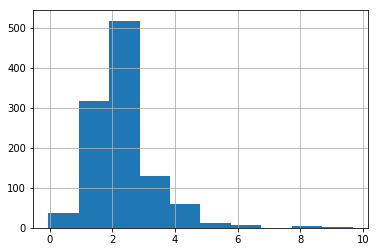

In [30]:
import matplotlib.pyplot as plt
df_avg['AvgSpeed'].hist()
plt.show()

In [31]:
dff.columns

Index([u'Timestamp_x', u'NewVehicleRef_x', u'VehicleDistanceAlongRoute_x',
       u'VehicleDistanceAlongRoute_y', u'Timestamp_y', u'segment_id',
       u'DistanceDelta', u'TimeDelta', u'AvgSpeed', u'timeinseconds',
       u'HalfHourly', u'ID', u'from', u'to', u'segment', u'meter', u'feet',
       u'intersections', u'blocks', u'busstops', u'Timestamp',
       u'NewVehicleRef_y', u'VehicleDistanceAlongRoute', u'DayOfWeek',
       u'Holiday', u'BusLane', u'Time', u'Date'],
      dtype='object')

In [32]:
dff = dff[['NewVehicleRef_x', 'Timestamp_x', 'segment_id', 'AvgSpeed', 'HalfHourly', 'intersections', 'busstops',  'DayOfWeek', 'Holiday', 'BusLane']]

In [34]:
dff.head()

,NewVehicleRef_x,Timestamp_x,segment_id,AvgSpeed,HalfHourly,intersections,busstops,DayOfWeek,Holiday,BusLane
0,MTA NYCT_3829_1,2018-04-08 16:00:17.604000-04:00,2,2.445659,0,15,5,5,0,True
1,MTA NYCT_3829_1,2018-04-08 16:00:17.604000-04:00,2,2.445659,0,15,5,5,0,True
2,MTA NYCT_3829_1,2018-04-08 16:00:17.604000-04:00,2,2.445659,0,15,5,5,0,True
3,MTA NYCT_3829_1,2018-04-08 16:00:17.604000-04:00,2,2.445659,0,15,5,5,0,True
4,MTA NYCT_3829_1,2018-04-08 16:00:17.604000-04:00,2,2.445659,0,15,5,5,0,True


In [35]:
dff.to_csv('bus_train.csv')